In [ ]:
using BilliardModels

using PyCall
using PyPlot

[Link to heading](#Heading)

# Basic object construction

In [ ]:
w = Vector2D(3, 4)

In [ ]:
v = Vector2D([3., 4.])

In [ ]:
p = Particle(v,v)
q = Particle(w,w)

In [ ]:
p = Particle([1.,2.],[3.,4.])

In [ ]:
d = Disc([1,2],3)

In [ ]:
d = Disc([1.,2.],3)

## Testing with validated numerics:

In [ ]:
using ValidatedNumerics

In [ ]:
p = Particle([@interval(0.1), @interval(0.1)], [@interval(1), @interval(0)])

# Collisions

In [ ]:
d = Disc([0, 0], 1)
p = Particle([-2, 0], [1, 0])

@assert collision_time(p, d) == 1

p = Particle([0, 0], [1, 0])
l = Plane([1, 0], [1, 0])
@assert collision_time(p, l) == 1

In [ ]:
table = Sinai_billiard(0.1)

In [ ]:
p = Particle([0.3, 0], [1, 0.1])

for obstacle in table.obstacles
    @show obstacle
    @show collision_time(p, obstacle)
    println()
end

In [ ]:
calculate_next_collision(p, table, nothing)

In [ ]:
xs = billiard_dynamics(p, table, 100)

In [ ]:
@pyimport matplotlib.patches as patches

In [ ]:
fig, axes = plt.subplots();

In [ ]:
include("../src/BilliardVisualisation.jl")

In [ ]:
axes

In [ ]:
draw(table, axes);  # obstacles
draw(xs, axes);  # trajectory
#sca(axes)
axes[:axis]("image")

In [ ]:
fig  # display the figure

In [ ]:
p2 = Particle([0.3, 0], [1, 0.101])
xs2 = billiard_dynamics(p2, table, 100)
draw(xs2, axes);
fig

# Using widgets:

In [1]:
using BilliardModels

using PyCall
using PyPlot

include("../src/BilliardVisualisation.jl")

INFO: Loading help data...


bdraw (generic function with 7 methods)

In [2]:
using Interact

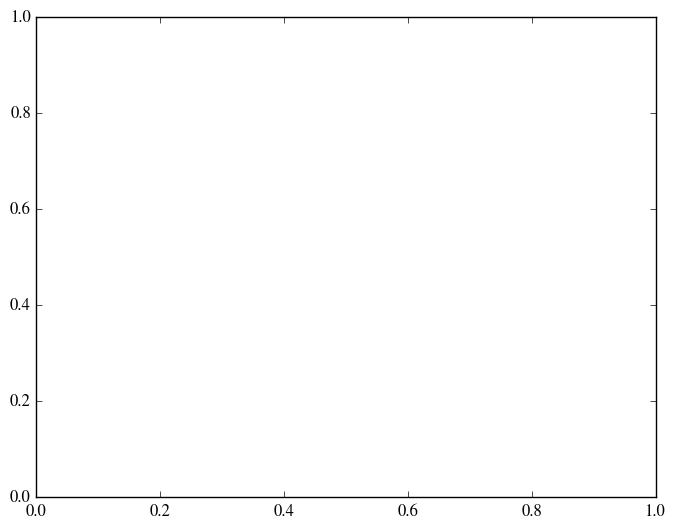

In [3]:
fig, axes = plt.subplots();

Slider{Int64}([Input{Int64}] 5,"num_particles",5,1:10)

Slider{Int64}([Input{Int64}] 25,"n",25,1:50)

Slider{Int64}([Input{Int64}] 25,"segment_length",25,1:50)

Figure(PyObject <matplotlib.figure.Figure object at 0x113d81090>)

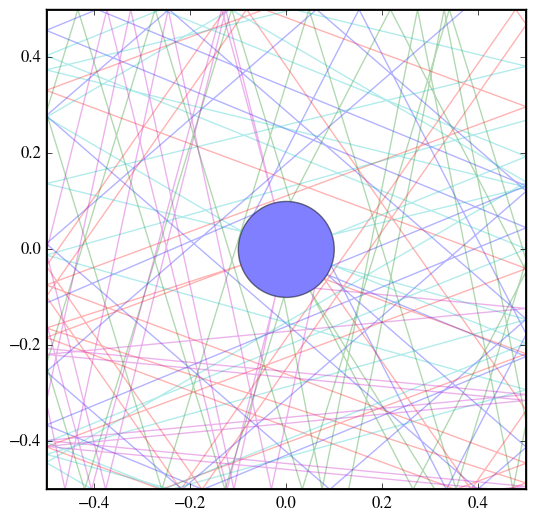

In [4]:
table = Sinai_billiard(0.1)

max_particles = 10
max_bounces = 50

particles = Particle[]
xxs = Any[]
lines = Any[]

x0 = Vector2D(0.3, 0.)

for i in 1:max_particles
    push!(particles, Particle(x0, Vector2D(1., 0.1+0.00001*i)))
    push!(xxs, billiard_dynamics(particles[i], table, max_bounces))
    push!(lines, axes[:plot]([], [], alpha=0.3)[1])
    
end

# xx1 = billiard_dynamics(p1, table, 50)  # returns a list of Vector2D
# xx2 = billiard_dynamics(p2, table, 50)


bdraw(table, axes)
axes[:axis]("image")

# line1 = axes[:plot]([], [])[1]
# line2 = axes[:plot]([], [])[1]

function draw_partial_line(line, xx)
    x = [pt.x for pt in xx]
    y = [pt.y for pt in xx]
    
    line[:set_data](x,y)
end

max_segment_length = max_bounces
    
@manipulate for num_particles=1:max_particles, n=1:max_bounces, segment_length=1:max_segment_length
    withfig(fig) do
        for i in 1:num_particles
#         draw_partial_line(line1, xx1[1:n])
#         draw_partial_line(line2, xx2[1:n])
            draw_partial_line(lines[i], xxs[i][n:min(n+segment_length, max_bounces)])
        end
        
        # delete other lines:
        for i in num_particles+1:max_particles
            draw_partial_line(lines[i], [])
        end
        
    end
end

# Initial conditions

In [ ]:
using BilliardModels
include("../src/BilliardVisualisation.jl")

In [ ]:
table = Sinai_billiard(0.1)

In [ ]:
isvalid(Vector2D(0.2, 0.), table)

In [ ]:
isvalid(Vector2D(0, 0), table)

In [ ]:
Plane([0.5, -0.5], [-1., 0.])

In [ ]:
isvalid(Vector2D(3,0), table)

In [ ]:
x, v = initial_condition(table, -0.5, 0.5, -0.5, 0.5)

In [ ]:
isvalid(x, table)

In [ ]:
include("../src/BilliardVisualisation.jl")

In [ ]:
fig, axes = plt.subplots();

In [ ]:
table = Sinai_billiard(0.1)

draw(table, axes);  # obstacles
#sca(axes)
axes[:axis]("image")

#x, v = initial_condition(table, -0.5, 0.5, -0.5, 0.5)
x = Vector2D(0.2, 0.2)
v = Vector2D(0.1, 0.9)

1 = Particle(x, v)
draw(p, axes, true);

N = 20
xs = billiard_dynamics(p, table, N)
draw(xs, axes);

fig

# Lattice

In [ ]:
using BilliardModels
include("../src/BilliardVisualisation.jl")

using PyCall
using PyPlot

In [ ]:
b = CellBoundary([0.5,0],[-1.,0.],Vector2D(0,0))
b2 = CellBoundary([-0.5,0],[1.,0.],Vector2D(0,0))
b.other_side = b2
b2.other_side = b

In [ ]:
x = Vector2D(0.2, 0.2)
v = Vector2D(1., 0.)
p = Particle(x, v)
collision_time(p,b)

In [ ]:
billiard_table = Sinai_billiard(0.1,true,true)

In [ ]:
isa(b,BilliardModels.AbstractPlane)

In [ ]:
billiard_table = Sinai_billiard(0.1,true,true)

x = Vector2D(0.2, 0.2)
v = Vector2D(0.1, 0.9)
l = Vector2D(0,0)
p = ParticleOnLattice(x, v, l)

xs, ls = billiard_dynamics_on_lattice(p, billiard_table, 3)

In [ ]:
ls

In [ ]:
using PyCall
using PyPlot

In [ ]:
include("../src/BilliardVisualisation.jl")

In [ ]:
fig, axes = plt.subplots();

In [ ]:
billiard_table = Sinai_billiard(0.354,true,true)

#x = Vector2D(0.2, 0.2)
#v = Vector2D(0.1, 0.9)
x = Vector2D(0.3, 0.)
v = Vector2D(0.99, 0.01)
l = Vector2D(0, 0)
p = ParticleOnLattice(x, v, l)

#bdraw(p, axes, true);

@time xs, ls, free_paths = billiard_dynamics_on_lattice(p, billiard_table, 100000)

bdraw(billiard_table, axes);  # obstacles
bdraw(xs+ls, axes);

fig

In [ ]:
for offset in unique(ls)
    bdraw(billiard_table, axes, offset)
end

In [ ]:
h = 3
axes[:set_xlim](-h, h)
axes[:set_ylim](-h, h)

fig

In [ ]:
free

In [ ]:
free_paths

In [ ]:
plt.hist(free_paths[free_paths .< 20],20)

In [ ]:
using BilliardModels

In [ ]:
using BilliardModels

billiard_table = Sinai_billiard(0.354,true,true)

x = Vector2D(0.3, 0.)
v = Vector2D(0.99, 0.01)
l = Vector2D(0, 0)
p = ParticleOnLattice(x, v, l)

N = 1_000_000
xs, ls, free_paths = billiard_dynamics_on_lattice(p, billiard_table, 1);
@time xs, ls, free_paths = billiard_dynamics_on_lattice(p, billiard_table, N);


In [ ]:
length(free_paths)

In [ ]:
maximum(free_paths)

In [ ]:
using PyPlot

In [ ]:
plt.hist(free_paths[2 .< free_paths .< 100], 1000, log=true, normed=true)

In [ ]:
plt.hist(free_paths, 1000, log=true, normed=true)

In [ ]:
h = hist(free_paths, 1000)

In [ ]:
h = hist(free_paths, 1000)
bins = h[1]
bins = 0.5*(bins[1:end-1] + bins[2:end])
loglog(bins, h[2])

In [ ]:
plt.hist(free_paths, 100);

In [ ]:
sizeof(free_paths)

In [ ]:
sizeof(xs)

In [ ]:
sizeof(ls)

In [ ]:
h = hist(log(free_paths[free_paths .> 2]), 1000)
bins = h[1]
bins = 0.5*(bins[1:end-1] + bins[2:end])
semilogy(bins, h[2])

# Testing that free paths are correct

In [ ]:
using BilliardModels

In [ ]:
billiard_table = Sinai_billiard(0.354, true, true)  # periodic in x and y

    # x = Vector2D(0.3, 0.)
    # v = Vector2D(0.99, 0.01)
    
x, v = initial_condition(billiard_table, -.5, .5, -.5, .5)

l = Vector2D(0, 0)
p = ParticleOnLattice(x, v, l)

num_collisions = 10
xs, ls, free_paths = billiard_dynamics_on_lattice(p, billiard_table, num_collisions);

In [ ]:
positions = xs + ls

lengths = [ norm(positions[i+1] - positions[i]) for i in 1:length(positions)-1 ]
all(map(abs, free_paths - lengths) .< 1e-14)

# Continuous-time dynamics

In [ ]:
using BilliardModels

In [ ]:
billiard_table = Sinai_billiard(0.354, true, true)  # periodic in x and y
x, v = initial_condition(billiard_table, -.5, .5, -.5, .5)
l = Vector2D(0, 0)
p = ParticleOnLattice(x, v, l)
num_collisions = 10
xs, ls, free_paths = billiard_dynamics_on_lattice(p, billiard_table, num_collisions)

positions, times = continuous_time(xs, ls, free_paths, 0.25)

x = [pos.x for pos in positions]
y = [pos.y for pos in positions];

In [ ]:
using PyPlot

In [ ]:
include("../src/BilliardVisualisation.jl")

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))

In [ ]:
# Draw discrete collisions and continuous interpolations:

bdraw(billiard_table, axes)

axes[:axis]("image")

axes[:plot](x, y, "o-")

bdraw(xs+ls, axes);


In [ ]:
fig